##**Assignement Price Prediction Of Diamonds**

**Exploring the giving data:**

This classic dataset contains features of almost 54k diamonds, including in the price, color, dimensions, etc.

**Explaining the features: **

**Carat:** it ranges from 0.2 to 1+ , it is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points.

**Cut:** from fair, Very Good, Premium, Ideal it is realted to the quality of the cut, meaning the more precise the more captivating.

**Color:** Assigning letters from D to Z according to GIA color scale, the Closer to Z your are the better.

**Clarity:** Diamond Clarity Refers to the Absence of Inclusions and Blemishes. So we associate FL(flawless) which means no inclusions and no blemishes visible under 10x magnification. (IF) Internally Flawless ,VVS1, VVS2, VS1, VS2, SI1, SI2 and Finally I1 which is the worst including more Flaws.

**Dimensions:**
x length, y width, z depth.

**The price is our Target column.**
 Let's start by importing the libraries needed!

In [1]:
#Importing all the libraries needed for this project 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Importing the data set and Preprocessing

In [2]:
df= pd.read_csv('/content/diamonds.csv')
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [3]:
#shape of the dataset
df.shape

(53940, 11)

We start preprocessing the data ( cleaning, Identifying and removing outlies..

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


All the columns contain values.
The first column ''Unnamed:0''  is an index of the dataset

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


After analysing the describe table: 

*   The count is all set for the columns.(it suits the dimensions of the dataset)
*   x,y and z which represents the dimensions have '0' as a minimum value which theoratically is fine, but it doesn't make sense for our diamonds dimensions, therefore we should filter these zeros out preventing wrong results.


In [6]:
#Dropping zeros
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

We notice after showcasing the shape again that we lost 20 data points eleminating the faulty diamond dimensions.

In the next step I am going to analyse the outliers to be able to eliminate them.


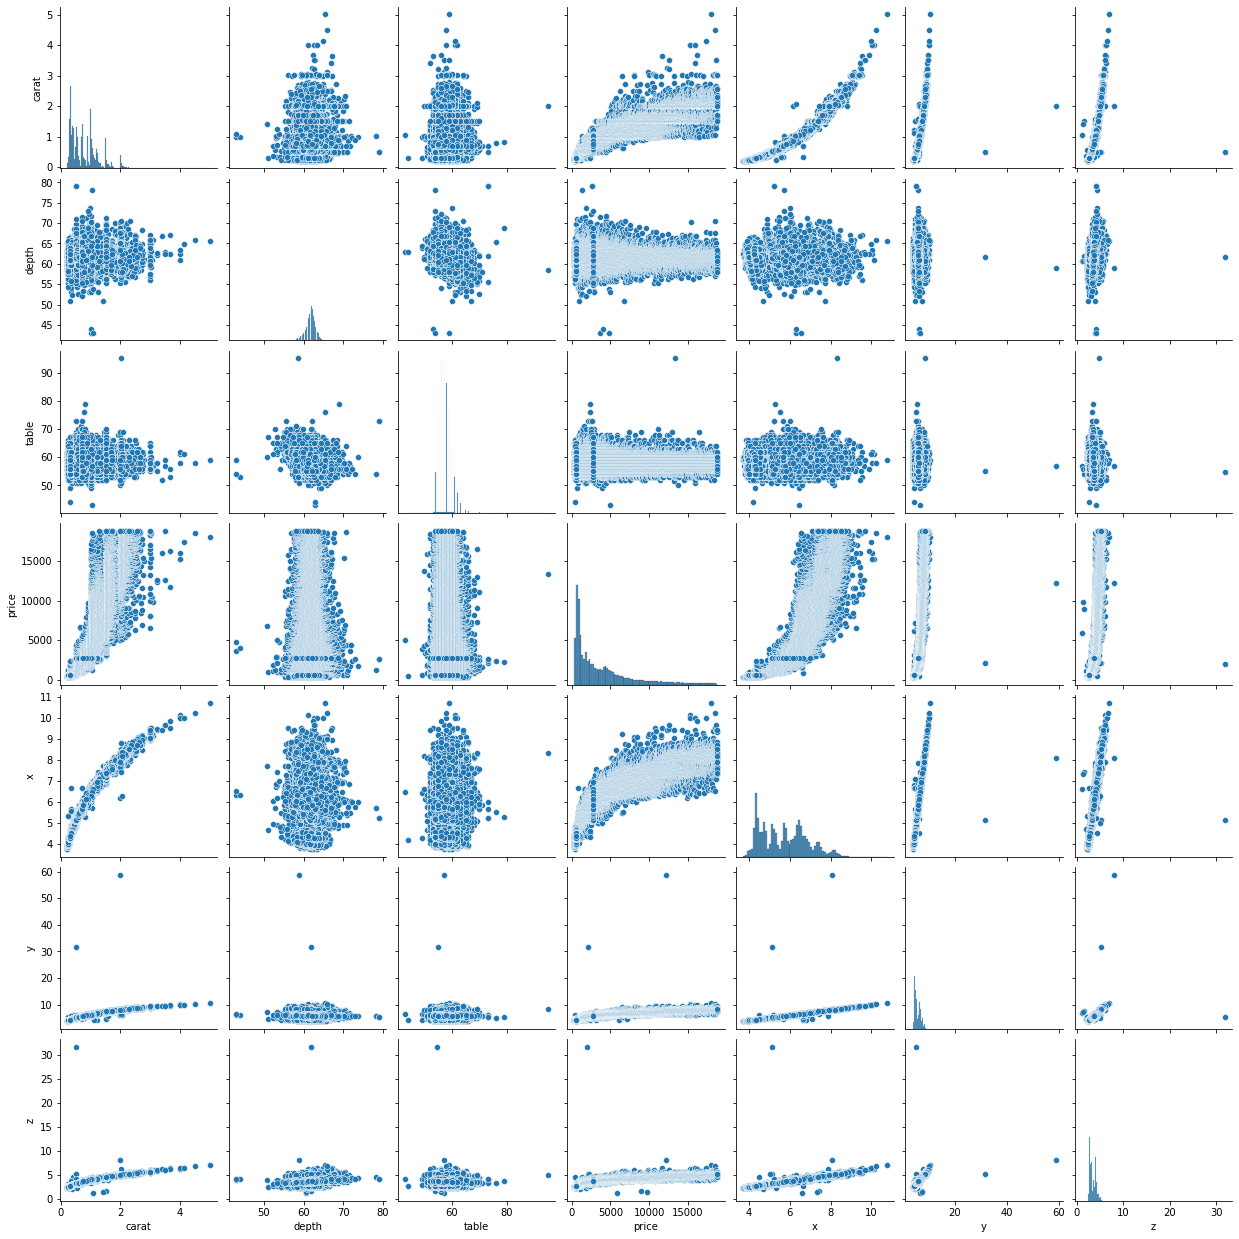

In [7]:
sns.pairplot(df)
plt.show()

Some points to extract after the analysis:

The price vs 'y' and 'z' have some dimensional outlies that needs to be eliminated. the price vs 'depth' and 'table' also has some outlies too.

Also we can seperately plot to have a clear view.

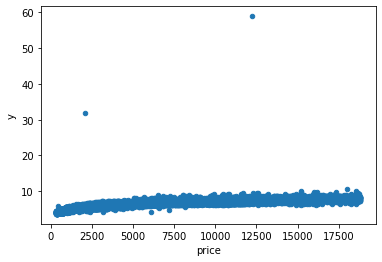

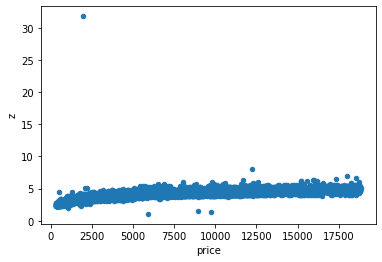

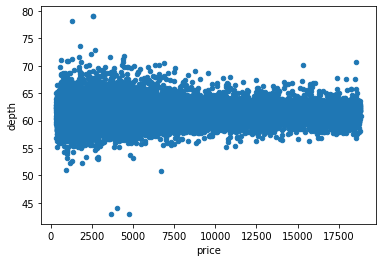

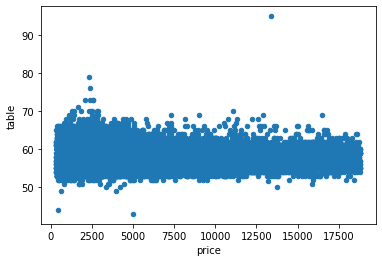

In [8]:
df.plot.scatter(x='price',y='y')
df.plot.scatter(x='price',y='z')
df.plot.scatter(x='price',y='depth')
df.plot.scatter(x='price',y='table')

Now we can proceed by eliminating these outlies and then checking the shape for the updates.

In [9]:
#Filtering the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

Now that we removed these outlies let's check the pairplot again.

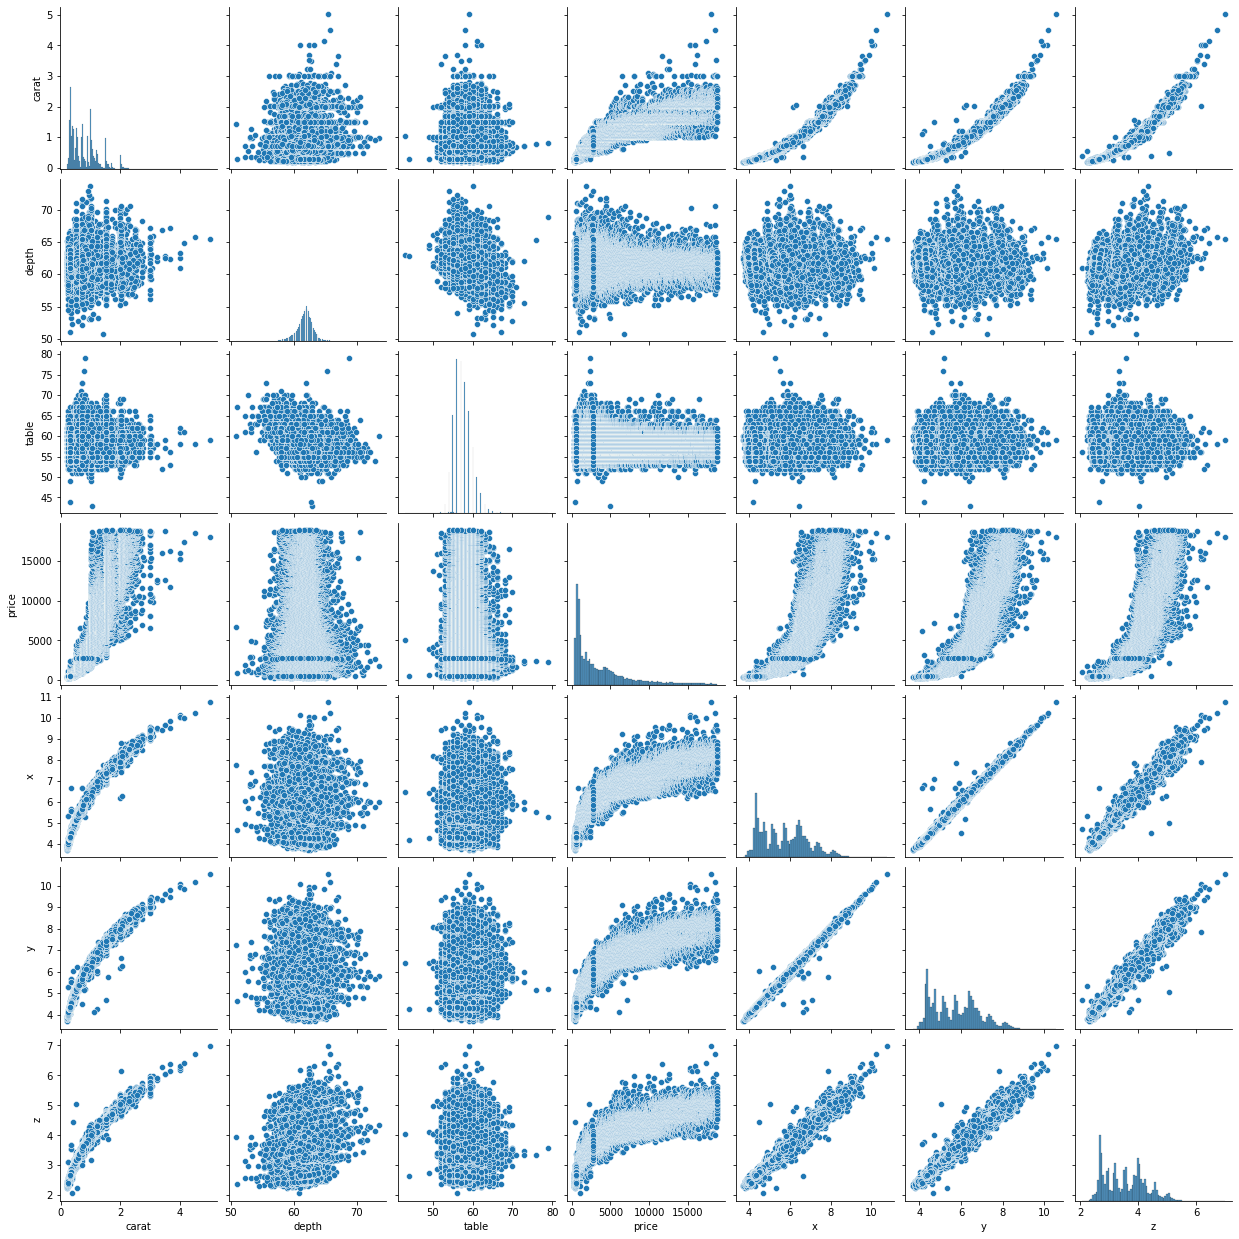

In [10]:
sns.pairplot(df)
plt.show()

We notice that it is much more clean this way. For the next step we're going to check the categorical features and see what should be done vis-à-vis the price.

In [12]:
# Extract the list of categorical variables
variable = (df.dtypes =="object")
object_cols = list(variable[variable].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


So we dispose of three Categorical variables which are CUT, COLOR and CLARITY. lets check the frequency of our categorical variables and its relation with the price.

In [13]:
#cut 
cut = df.cut.value_counts()
print(cut)
#color
color = df.color.value_counts()
print(color)
#clarity
clarity = df.clarity.value_counts()
print(clarity)

Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: cut, dtype: int64
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: color, dtype: int64
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: clarity, dtype: int64


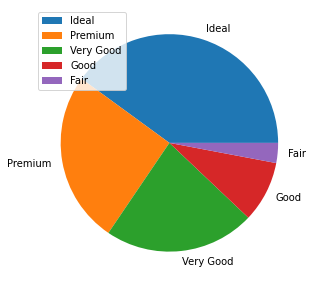

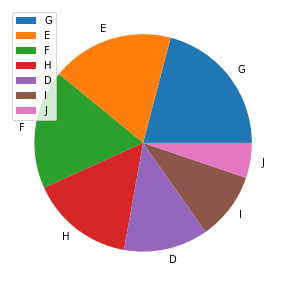

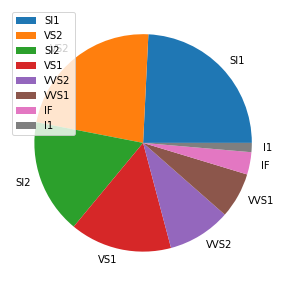

In [14]:
#pie chart for cut
f, ax = plt.subplots(figsize=(15,5))
ax.pie(cut, labels=cut.keys())
ax.legend(labels=cut.keys(), loc=2)
#pie chart for color
f, ax = plt.subplots(figsize=(15,5))
ax.pie(color, labels=color.keys(),)
ax.legend(labels=color.keys(), loc=2)
#pie chart for clarity
f, ax = plt.subplots(figsize=(15,5))
ax.pie(clarity, labels=clarity.keys())
ax.legend(labels=clarity.keys(), loc=2)

We can see the distribution of the cut is not uniform, being fair cut the smallest sample.

Color frequency is more evenly distributed than cut frequency, although the let's keep in mind the order of colors, from J (worst) through D. (best).

We can easily observe that the clarity may be the feature that is distributed less evenly. The lowest and finest clarities are also the oddest, based on the following scale: I1 (worst), SI2 (second worst), VS2 (second best), VVS2 (second best), and IF (best).

We should proceed with a violin plot so we can analyse clearly the correlation with the price.

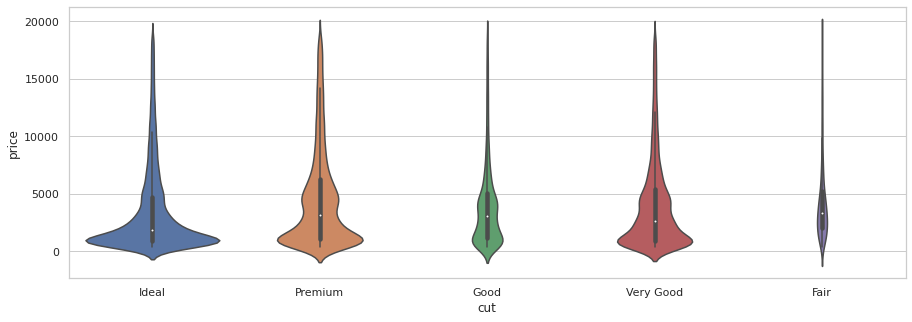

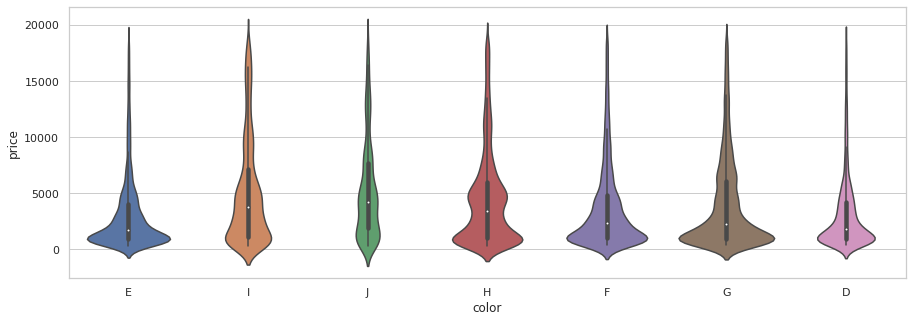

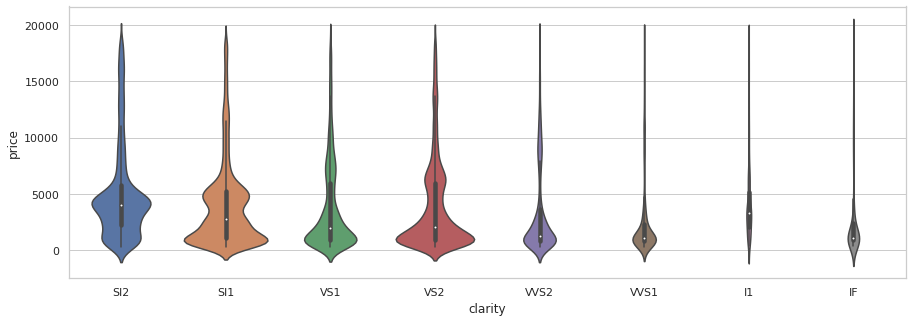

In [15]:
#cut violin
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.violinplot(x="cut", y="price", data=df, scale="count")

#color violin
plt.figure(figsize=(15,5))
sns.violinplot(x="color", y="price", data=df, scale="count")

#clarity violin
plt.figure(figsize=(15,5))
sns.violinplot(x="clarity", y="price", data=df, scale="count")

*   After analysing the plot, it appears that the best cut can be negatively correlated with price. 'Premium' and 'very good' cuts have a higher percentage of their sample in a higher price while being the largest group.

*   Although J and I are the two "worst" hues, respectively, this graph reveals an intriguing fact: their median price is the highest! Additionally, D and E experience the opposite; while being the greatest colors, they have the lowest median prices. Therefore, we may claim that in this case, price and color appear to be negatively correlated. So we might sayt the better the color, the less expensive the item?

*  In the last plot we observe a relationship between price and clarity that appears to be unfavorable. The price goes down as clarity improves. except for I1, which is in the second position but perhaps due to its tiny sample size.


For the next step :
Label encoding the data in order to get rid of object dtype.

In [16]:
# Making a copy 
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


At last we proceed with our heat map.

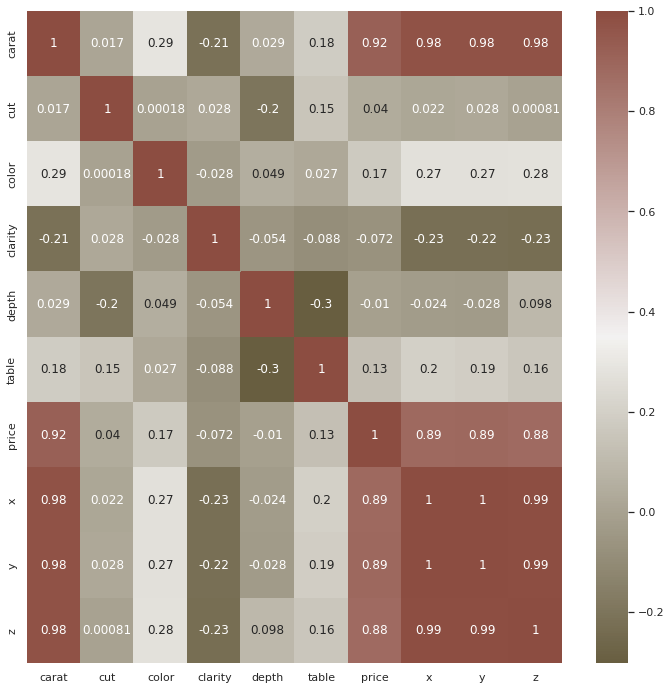

In [18]:
#correlation matrix 
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True )

We can extract final conclusions from the correlation matrix:


---


*   'x', 'y' and 'z' present respectively 0.89, 0.89 and 0.88 high correaltion with the 'price' our target column.
*   'cut', 'depth' and 'table' presnet respectively 0.04, -0.01 and 0.13 very low correlation with the our target column.

In this Phase we Proceed the Model Building.

In [19]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [20]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[20:08:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -750.538266 
RandomForest: -548.110938 
KNeighbors: -823.648809 
[20:14:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Testing the Model with the best score on the test set

In the above scores, Random Forest seems to be the model with the best scoring! On negative root mean square error.
Let's test this model on a test set and evaluate it with different parameters.

In [23]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [24]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9809269722557697
Adjusted R^2: 0.9809142257458048
MAE: 270.4340372395715
MSE: 299214.3074283137
RMSE: 547.0048513754825
